In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error

import os

In [2]:
save_path = ('figures/1b2_5')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 30
seed = 10

l_r = 0.001

In [4]:
histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

In [6]:
# Shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [7]:
# Normalize
# X ~ N(0,1)
X_data = ((X_data - np.mean(X_data, axis = 0))/ np.std(X_data, axis =0))
print(X_data[1])

[0.3658602  0.26229304 0.79882862 0.59665321 0.61012728 0.13612981
 0.90911166]


In [8]:
trainY = Y_data[:280]
testY = Y_data[280:]

In [9]:
# Number of input feature = 6
# remove input found from precious experiment
# input number 4, index number 3
X_d=[]
for i in range(len(X_data)):
    x_d = np.delete(X_data[i],np.array(3))
    X_d.append(x_d)

    x6_data = np.array(X_d)
    print(x6_data)

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.3873

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

 [-1.11765165 -0.8924562  -0.95202863  0.61012728  0.22008283 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.2622930

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

 [ 0.1913294   0.42725722 -0.07660001 -1.06145431  0.32082644 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 2.02390285  1.25207811  1.67425725  1.16732114  1.42900622  0.90911166]
 [ 0.1913294   0.42725722 -0.07660001 -1.06145431  0.32082644 -1.09997489]
 [-0.24499762 -0.39756367 -0.95202863 -1.61864817 -1.61009288 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.1913294   0.42725722 -0.07660001 -1.06145431  0.32082644 -1.09997489]
 [-0.24499762 -0.39756367 -0.95202863 -1.61864817 -1.61009288 -1.09997489]
 [ 0.80218721  0.42725722 -0.07660001  0.05293342  0.27045463  0.90911166]]
[[-0.7685900

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.54039101 -0.56252785 -0.07660001  0.61012728 -0.26684465  0.90911166]
 [ 1.06398342  0.42725722 -0.95202863 -0.50426044  0.92528814  0.90911166]
 [-0.07046681  0.26229304  0.79882862  0.05293342  0.27045463  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 1.06398342  0.42725722 -0.95202863 -0.50426044  0.92528814  0.90911166]
 [-0.07046681  0.26229304  0.79882862  0.05293342  0.27045463  0.90911166]
 [-0.94312084 -0.23259949 -0.95202863 -1.06145431 -0.77056274 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602 

In [10]:
# Number of input feature = 5
# remove input found from precious experiment
# input number 2, index number 1
X_d=[]
for i in range(len(x6_data)):
    x_d = np.delete(x6_data[i],np.array(1))
    X_d.append(x_d)

    x5_data = np.array(X_d)
    print(x5_data)

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852 

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

 [-1.46671326 -0.95202863 -1.61864817 -1.22390901 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.9

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602  -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.82745726 -1.06145431 -1.08958419 -1.09997489]
 [ 1.67484124  1.67425725  0.05293342  2.01667732  0.90911166]
 [ 1.06398342  1.67425725  1.16732114  1.42900622  0.90

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.15773222 -0.95202863 -0.50426044 -0.16610104  0.90911166]
 [ 1.41304503  1.67425725  1.724515    1.2611002   0.90911166]
 [ 1.32577963  1.67425725  1.724515    1.46258743  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 1.41304503  1.67425725  1.724515    1.2611002   0.90911166]
 [ 1.32577963  1.67425725  1.724515    1.46258743  0.90911166]
 [-0.59405923 -0.07660001  0.05293342  0.11933921 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 1.32577963  1.67425725  1.724515   

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.2785948  -0.95202863 -0.50426044  0.0353862  -1.09997489]
 [-0.24499762 -0.07660001  0.05293342 -0.72019093  0.90911166]
 [-0.59405923  0.79882862  1.16732114  0.74059151  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.07660001  0.05293342 -0.72019093  0.90911166]
 [-0.59405923  0.79882862  1.16732114  0.74059151  0.90911166]
 [-1.03038624 -0.95202863  0.61012728 -0.78735334 -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.59405923  0.79882862  1.16732114 

[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.85585544 -0.07660001 -0.50426044 -1.00563118  0.90911166]
 [-1.37944785 -0.95202863 -1.61864817 -0.63623792 -1.09997489]
 [ 0.62765641  0.79882862  0.61012728  0.92528814  0.90911166]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-1.37944785 -0.95202863 -1.61864817 -0.63623792 -1.09997489]
 [ 0.62765641  0.79882862  0.61012728  0.92528814  0.90911166]
 [-0.85585544 -0.07660001 -0.50426044 -0.5522849  -1.09997489]]
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.62765641  0.79882862  0.61012728 

In [12]:
trainX = x5_data[:280]

testX = x5_data[280:]

In [13]:
print(testX[:2])

[[ 0.97671802  1.67425725  1.724515    1.51295924  0.90911166]
 [ 0.3658602   0.79882862  1.724515    0.87491633 -1.09997489]]


In [14]:
starter_model = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(0.001)),
    keras.layers.Dense(1, activation = 'linear')
])

In [15]:
starter_model.compile(optimizer='sgd',
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [16]:
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 1,
                                        validation_data=(testX,testY)
                                       )

Epoch 1/300
35/35 [==============================] - 0s 3ms/step - loss: 0.1836 - mse: 0.1754 - val_loss: 0.1191 - val_mse: 0.1109
Epoch 2/300
35/35 [==============================] - 0s 912us/step - loss: 0.0922 - mse: 0.0841 - val_loss: 0.0832 - val_mse: 0.0750
Epoch 3/300
35/35 [==============================] - 0s 911us/step - loss: 0.0647 - mse: 0.0566 - val_loss: 0.0607 - val_mse: 0.0527
Epoch 4/300
35/35 [==============================] - 0s 883us/step - loss: 0.0486 - mse: 0.0406 - val_loss: 0.0471 - val_mse: 0.0391
Epoch 5/300
35/35 [==============================] - 0s 883us/step - loss: 0.0383 - mse: 0.0303 - val_loss: 0.0384 - val_mse: 0.0304
Epoch 6/300
35/35 [==============================] - 0s 940us/step - loss: 0.0319 - mse: 0.0239 - val_loss: 0.0327 - val_mse: 0.0247
Epoch 7/300
35/35 [==============================] - 0s 907us/step - loss: 0.0274 - mse: 0.0195 - val_loss: 0.0286 - val_mse: 0.0207
Epoch 8/300
35/35 [==============================] - 0s 940us/step - lo

Epoch 62/300
35/35 [==============================] - 0s 969us/step - loss: 0.0123 - mse: 0.0050 - val_loss: 0.0124 - val_mse: 0.0051
Epoch 63/300
35/35 [==============================] - 0s 969us/step - loss: 0.0122 - mse: 0.0050 - val_loss: 0.0123 - val_mse: 0.0051
Epoch 64/300
35/35 [==============================] - 0s 940us/step - loss: 0.0122 - mse: 0.0050 - val_loss: 0.0123 - val_mse: 0.0051
Epoch 65/300
35/35 [==============================] - 0s 940us/step - loss: 0.0122 - mse: 0.0050 - val_loss: 0.0123 - val_mse: 0.0051
Epoch 66/300
35/35 [==============================] - 0s 940us/step - loss: 0.0122 - mse: 0.0050 - val_loss: 0.0123 - val_mse: 0.0051
Epoch 67/300
35/35 [==============================] - 0s 940us/step - loss: 0.0121 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0051
Epoch 68/300
35/35 [==============================] - 0s 940us/step - loss: 0.0121 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0051
Epoch 69/300
35/35 [==============================] - 0s 940us

Epoch 123/300
35/35 [==============================] - 0s 969us/step - loss: 0.0110 - mse: 0.0044 - val_loss: 0.0115 - val_mse: 0.0049
Epoch 124/300
35/35 [==============================] - 0s 940us/step - loss: 0.0110 - mse: 0.0044 - val_loss: 0.0115 - val_mse: 0.0049
Epoch 125/300
35/35 [==============================] - 0s 940us/step - loss: 0.0109 - mse: 0.0043 - val_loss: 0.0116 - val_mse: 0.0050
Epoch 126/300
35/35 [==============================] - 0s 941us/step - loss: 0.0109 - mse: 0.0043 - val_loss: 0.0115 - val_mse: 0.0049
Epoch 127/300
35/35 [==============================] - 0s 912us/step - loss: 0.0109 - mse: 0.0043 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 128/300
35/35 [==============================] - 0s 912us/step - loss: 0.0109 - mse: 0.0043 - val_loss: 0.0115 - val_mse: 0.0049
Epoch 129/300
35/35 [==============================] - 0s 940us/step - loss: 0.0109 - mse: 0.0043 - val_loss: 0.0115 - val_mse: 0.0049
Epoch 130/300
35/35 [==============================] - 

Epoch 184/300
35/35 [==============================] - 0s 968us/step - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0110 - val_mse: 0.0049
Epoch 185/300
35/35 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 186/300
35/35 [==============================] - 0s 968us/step - loss: 0.0101 - mse: 0.0041 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 187/300
35/35 [==============================] - 0s 912us/step - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 188/300
35/35 [==============================] - 0s 940us/step - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 189/300
35/35 [==============================] - 0s 883us/step - loss: 0.0100 - mse: 0.0040 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 190/300
35/35 [==============================] - 0s 912us/step - loss: 0.0100 - mse: 0.0040 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 191/300
35/35 [==============================] - 0s

Epoch 245/300
35/35 [==============================] - 0s 940us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 246/300
35/35 [==============================] - 0s 940us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0104 - val_mse: 0.0048
Epoch 247/300
35/35 [==============================] - 0s 969us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 248/300
35/35 [==============================] - 0s 913us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 249/300
35/35 [==============================] - 0s 940us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 250/300
35/35 [==============================] - 0s 912us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 251/300
35/35 [==============================] - 0s 970us/step - loss: 0.0094 - mse: 0.0039 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 252/300
35/35 [==============================] - 

In [17]:
print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(histories['starter'].history['loss'][-1], histories['starter'].history['val_loss'][-1]))

train m.s.e. = 0.009, test m.s.e. = 0.010


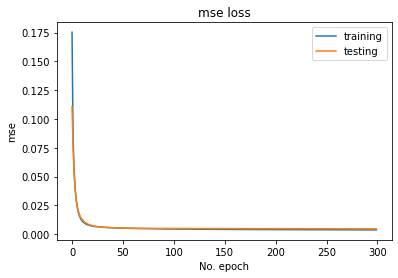

In [18]:
plt.plot(histories['starter'].history['mse'], label='training')
plt.plot(histories['starter'].history['val_mse'], label='testing')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.title('mse loss')
plt.savefig('./%s/mse_VS_e'%(save_path))
plt.show()

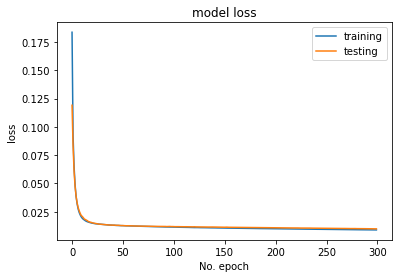

In [19]:
plt.plot(histories['starter'].history['loss'], label='training')
plt.plot(histories['starter'].history['val_loss'], label='testing')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.title("model loss")
plt.legend(loc="best")
plt.savefig('./%s/loss_vs_e.png'%(save_path))
plt.show()

In [20]:
prediction = starter_model.predict(testX)

In [21]:
MSE_scaled = mean_squared_error(testY, prediction)
print(MSE_scaled)

0.004692847891210916


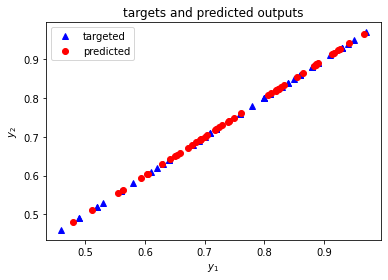

In [24]:
plot_targets = plt.plot(testY[:50], testY[:50], 'b^', label='targeted')
plot_pred = plt.plot(prediction[:50], prediction[:50], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('targets and predicted outputs')
plt.savefig('./%s/target_vs_predicted'%(save_path))
plt.legend(loc="best")
plt.legend()

In [25]:
print(prediction[:10])

[[0.92436653]
 [0.82377774]
 [0.7045614 ]
 [0.6591988 ]
 [0.56267935]
 [0.824414  ]
 [0.7490077 ]
 [0.629107  ]
 [0.80707645]
 [0.88673824]]
